## Load required modules

In [1]:
# External libraries
import numpy as np
import pandas as pd
import pygal
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils 
from svgutils.compose import *
#import svgwrite

# Custom code
from fx_RNAseq import *
def findgene(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def findgenelist(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,5)
    n = np.append(n, 4.5 + np.arange(1,5))
    h_start = 7
    h_end = 15
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(10*i))
        h = np.append(h,temph)
    return n, h

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

from pygal.style import Style
custom_style = Style(
    background = 'black',
    plot_background = '#111111',
    foreground = '#999999',
    foreground_strong = '#eeeeee',
    foreground_subtle = '#555555',
    opacity = '.8',
    opacity_hover = '.4',
    transition = '10ms',
    colors = ('#B400FF', '#3232FF'),
    label_font_size = 24,
    major_label_font_size = 24,
    title_font_size = 24,
    legend_font_size = 18
)

In [11]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

/Users/angueyraaristjm/Dropbox/LiLab/RNAseq/genePlots/combos


***
# Index <a id='Index'>∮</a>
***
- [Plot Total Number of Reads](#nReads)
- [BarPlot: Opsins](#barOpsins)
- [BarPlot: Custom](#barCustom)
- [BarPlot: Many Genes](#barMany)
- [BarPlot_subPlotsAutomatic: Custom](#barManyAuto)
- [Heatmap: Opsins](#heatOpsins)
- [Heatmap: Custom](#heatCustom)
***

***
## Total number of reads<a id='nReads'>∮</a>
***
[Back to Index](#Index)

In [12]:
hist = pygal.Histogram(
    x_title='',
    y_title='million reads',
    show_x_labels=False,
    title='',
    style=custom_style,
    legend_at_bottom=True,
    legend_at_bottom_columns=4,
    show_legend=False
)

hist.add('UV-Cone',[
    (15.710882,0.2,0.8),
    (10.873172,1.2,1.8),
    (17.410638,2.2,2.8),
    (15.763850,3.2,3.8),
])
hist.add('S-Cone',[
    (15.390731,4.2,4.8),
    (15.557118,5.2,5.8),
    (15.617877,6.2,6.8),
    (24.908813,7.2,7.8),
])

hist.render_to_file('test.svg')

a = [15.710882,10.873172,17.410638,15.763850,15.390731,15.557118,15.617877,24.908813]
[np.average(a),np.std(a)]
np.average(a)/(8000/1e6)

2050.516890625

***
## barPlot: Opsins<a id='barOpsins'>∮</a>
***
[Back to Index](#Index)

In [ ]:
genename = 'opn1sw1'
n,h = plotBars(genename)
h = h / 1e6
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_Opsins(genename, fH, ax, pH)
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

***
## barPlot: Custom Gene<a id='barCustom'>∮</a>
***
[Back to Index](#Index)

> Genes to pay attention to but still haven't given interesting results
> cdh (cadherins)
> protocadherins
> semaphorins
> plexins (plx)
> laminins (lamb) and integrins (itg)
> dystroglycan (dag), dystrophin (dmd), pikachurin
> neurexins
> cadm
> dscam and sidekicks (sdk)
> pappaa


In [ ]:
gdf = findgenelist('rdh')
gdf

In [ ]:
# genename = 'prickle3'
# genename = 'grin1b'
genename = 'cdhr1a'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure(genename, fH, ax, pH)
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

***
## barPlot: Many Genes Layout<a id='barMany'>∮</a>
***
[Back to Index](#Index)

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

***
## barPlot: Many Genes Layout Using Subplots (proper way)<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','rhol']
UVline = 1925829.5;
Sline = 824782.34;

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    uvlH = plt.axhline(y=UVline,linewidth=1, linestyle="--", color='#520075', zorder=-1)
    slH = plt.axhline(y=Sline,linewidth=1, linestyle="--", color='#000094', zorder=-1)
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")


In [ ]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("opn1sw.svg").move(0, 290*0),
       SVG("rho.svg").move(0, 290*1),
       SVG("opn1mw.svg").move(-110, 290*2),
       SVG("opn1lw.svg").move(0, 290*3)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

In [ ]:
# genelist = ['saga','sagb','arr3a','arr3b']
# plotName = 'arrestins'

# genelist = ['gngt1','gngt2a','gngt2b']
# plotName = 'gngt'

# genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb5b']
# plotName = 'gnb'

# genelist = ['pde6a','pde6b','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
# plotName = 'pde'

# genelist = ['gucy2d','gucy2f']
# plotName = 'GC'

# genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
# plotName = 'GCAP'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
# plotName = 'CNGalpha'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['rgs9a','rgs9b','rgs9bp',
#             'rgs3a','rgs6',
#             'rgs11','rgs12a','rgs16','rgs20']
# plotName = 'RGS'

# genelist = ['grk1a','grk1b',
#             'grk3',
#             'grk4','grk5','grk5l',
#             'grk6',
#             'grk7a','grk7b']
# plotName = 'GRK'

genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
plotName = 'rcvrn'

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

In [ ]:
# genelist = ['ctbp1','ctbp2a']
# plotName = 'ctbp'

# genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
# plotName = 'cadm'

# genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
# plotName = 'tjp'

# genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
# plotName = 'nrxn'

# genelist = ['eml1','eml2','eml3','eml5']
# plotName = 'eml'

# genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
# plotName = 'cpne'

# genelist = ['tbx2a','tbx2b']
# plotName = 'tbx2'

# genelist = ['chn1','chn2']
# plotName = 'chn'

# genelist = ['ncdn','ncdn']
# plotName = 'ztest'

# genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
# plotName = 'sema'

# genelist = ['cacna1aa','cacna1ab',
#             'cacna1da','cacna1db',
#             'cacna1fa','cacna1fb',
#             'cacna2d1a','cacna2d2a',
#             'cacna2d4a','cacna2d4b',
#             'cacna1sb',
#            ]
# plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
# plotName = 'stxBP'

genelist = ['stx4','stx12','stx6',
            'stx8','stx18',
            'stx3a','stx5al']
plotName = 'stx'

            
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

### According to Neuhauss recoverin1a in enriched in rods and UV-cones

***
## heatMap: Opsins<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

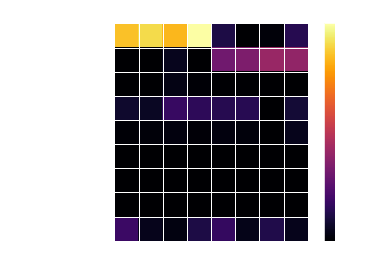

In [7]:
gdf = findgenelist('opn1')
gdf2 = findgene('rho')
gdf2
gdf = gdf.append(gdf2)
gdf.index = range(len(gdf))
gdf

Opsins = ["UV-opsin (opn1sw1)", "S-opsin (opn1sw2)","M-opsin (opn1mw1)","M-opsin (opn1mw2)","M-opsin (opn1mw3)","M-opsin (opn1mw4)","L-opsin (opn1lw1)","L-opsin (opn1lw2)","Rhodopsin (rho)"]
Samples = ["UV1","UV2","UV3","UV4","S1","S2","S3","S4"]

data = gdf.iloc[0:9,7:15]
data = data.reindex([6,7,2,3,4,5,0,1,8])
data.index = range(len(data))
np.around(np.divide(data.values,1e6),2)
opsinData = np.divide(data.values,1e6)

# log2 representation does not work well
# log2matrix = np.vectorize(log2)
# opsinData = log2matrix(opsinData)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

plotName = "opsinHeatMap"
fig, ax = plt.subplots()

im, cbar = heatmap(opsinData, Opsins, Samples, ax=ax,
                   cmap="inferno", cbarlabel="counts per million")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

***
## heatMap: Custom<a id='heatCustom'>∮</a>
***
[Back to Index](#Index)

In [2]:
plotName = "test"

# gdf = findgenelist('sema')
# plotName = "semaHeatMap"

# gdf = findgenelist('cdh')
# gdf = gdf.drop([26,27])
# gdf = gdf.reindex([0,9,21,22,23,24,25,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20])
# plotName = "cdhHeatMap"

# gdf = findgenelist('eph')
# gdf = gdf.drop([15,16,17,18])
# plotName = "ephHeatMap"


# gdf = findgenelist('efn')
# gdf = gdf.drop([15,16,17,18])
# plotName = "ephHeatMap"

# gdf = findgenelist('pdgf')
# gdf = findgenelist('rgr')
# gdf = findgenelist('lmo')
# gdf.index = range(len(gdf))
# gdf.sort_values(by=["log2FoldChange"])


## genes in 2019 Papal, Swaroop: # igsf11, epha10, tuft1, prtg, lrfn2, vasn

# gdf = findgenelist('igsf')
# gdf = findgenelist('tuft')
# gdf = findgenelist('prtg')
# gdf = findgenelist('lrfn')
gdf = findgenelist('vasn')

gdf = findgenelist('rdh')
gdf = findgenelist('cyp2')
gdf = findgenelist('cyb')

gdf = findgenelist('sag')

gdf = findgenelist('dio')
# gdf = gdf.drop(range(3,20))

gdf = findgenelist('lrfn')
gdf = findgenelist('lrrn')
gdf = findgenelist('dnmt')
gdf = findgenelist('tet')

gdf = findgenelist('isl')
gdf = findgenelist('gj')

gdf = findgenelist('fgf')
gdf = findgenelist('bmp')
gdf = findgenelist('fzd')
gdf = findgenelist('edar')
# gdf = findgenelist('axin')

gdf = findgenelist('cadm') # cadm2a in S-Cones probably(?) and cadm3 in all photoreceptors (Hunter, JCN, 2011)
# gdf = findgenelist('lrit') # for rods and cones?
# gdf = findgenelist('elfn') # for rods
# gdf = findgenelist('tenm') # for RGCs in zebrafish (Antinucci, Cell Reports, 2013)

# gdf = findgenelist('foxo')

gdf = findgenelist('sdk')



# For Karen Carleton

# gdf = findgenelist('rx')
# gdf = gdf.drop(range(3,20))
# plotName = "rxHeatMap"

# gdf = findgenelist('tbx')
# gdf = gdf.drop(range(17,21))
# plotName = "tbxHeatMap"

# gdf = findgenelist('six')
# plotName = "sixHeatMap"

# gdf = findgenelist('lin')
# gdf = gdf.drop(range(9,17))
# plotName = "mitfHeatMap"

gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,sdk1a,sidekick cell adhesion molecule 1a,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,15215
1,sdk1b,sidekick cell adhesion molecule 1b,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,15214
2,sdk2b,sidekick cell adhesion molecule 2b,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,28156


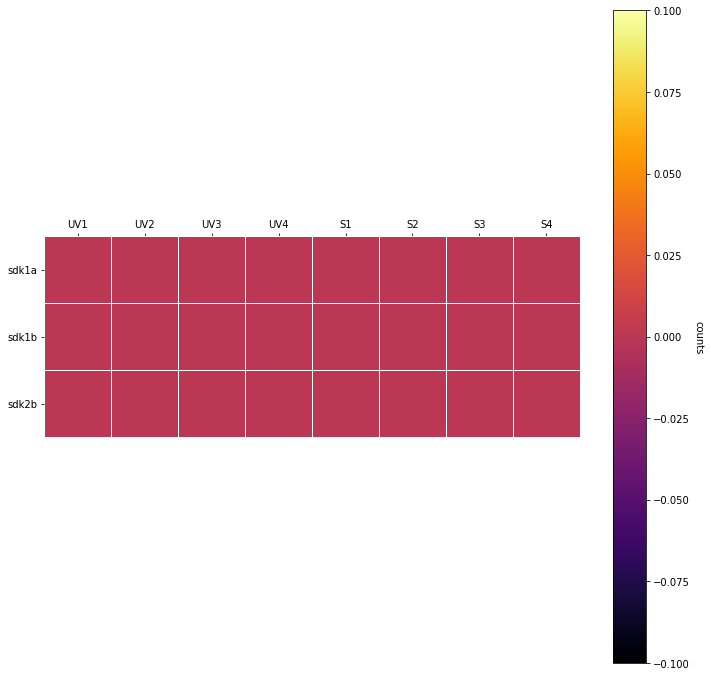

In [3]:
genenames = gdf['symbol'].values
samplenames = ["UV1","UV2","UV3","UV4","S1","S2","S3","S4"]
log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:15].values)
data = gdf.iloc[0:,7:15].values

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="counts")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()